In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2209_verkehrsunfaelle.csv'
data = pd.read_csv(df)

# Let us take a look at a few rows of the dataset
print(data.head(15))


        MONATSZAHL AUSPRÄGUNG  JAHR   MONAT   WERT  VORJAHRESWERT  \
0   Alkoholunfälle  insgesamt  2022  202201    NaN           16.0   
1   Alkoholunfälle  insgesamt  2022  202202    NaN           14.0   
2   Alkoholunfälle  insgesamt  2022  202203    NaN           24.0   
3   Alkoholunfälle  insgesamt  2022  202204    NaN           16.0   
4   Alkoholunfälle  insgesamt  2022  202205    NaN           24.0   
5   Alkoholunfälle  insgesamt  2022  202206    NaN           48.0   
6   Alkoholunfälle  insgesamt  2022  202207    NaN           44.0   
7   Alkoholunfälle  insgesamt  2022  202208    NaN           46.0   
8   Alkoholunfälle  insgesamt  2022  202209    NaN           54.0   
9   Alkoholunfälle  insgesamt  2022  202210    NaN           43.0   
10  Alkoholunfälle  insgesamt  2022  202211    NaN           33.0   
11  Alkoholunfälle  insgesamt  2022  202212    NaN           21.0   
12  Alkoholunfälle  insgesamt  2021   Summe  383.0          430.0   
13  Alkoholunfälle  insgesamt  202

In [92]:
# Let us look at the relevant columns
columns = list(data.columns)
print(columns)

['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT', 'VERÄND_VORMONAT_PROZENT', 'VERÄND_VORJAHRESMONAT_PROZENT', 'ZWÖLF_MONATE_MITTELWERT']


In [93]:
# New datadrame with only the five selected columns
df_sp = data.iloc[:, 0:5].copy()
print(df_sp.head())

       MONATSZAHL AUSPRÄGUNG  JAHR   MONAT  WERT
0  Alkoholunfälle  insgesamt  2022  202201   NaN
1  Alkoholunfälle  insgesamt  2022  202202   NaN
2  Alkoholunfälle  insgesamt  2022  202203   NaN
3  Alkoholunfälle  insgesamt  2022  202204   NaN
4  Alkoholunfälle  insgesamt  2022  202205   NaN


In [94]:
list(df_sp.columns)

['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT', 'WERT']

In [95]:
# Now we want to drop the data after 2020 to preprocess the dataset for developing the prediction model

# To filter out records after 2020
df_sp_y = df_sp[df_sp['JAHR']<=2020]
print(df_sp_y)

# Looking for null values if present
print(df_sp_y.isnull().sum())

           MONATSZAHL              AUSPRÄGUNG  JAHR   MONAT   WERT
25     Alkoholunfälle               insgesamt  2020   Summe  430.0
26     Alkoholunfälle               insgesamt  2020  202001   28.0
27     Alkoholunfälle               insgesamt  2020  202002   40.0
28     Alkoholunfälle               insgesamt  2020  202003   27.0
29     Alkoholunfälle               insgesamt  2020  202004   26.0
...               ...                     ...   ...     ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[1911 rows x 5 columns]
MONATSZAHL    0
AUSPRÄGUNG    0
JAHR          0
MONAT         0
WERT          0
dtype: int64


In [96]:
# Filter for a specific Category
category = 'Alkoholunfälle' 
#filtered_data = aggr_data[aggr_data['MONATSZAHL'] == category]
filtered_data = df_sp_y[(df_sp_y['MONATSZAHL'] == category) & (df_sp_y['AUSPRÄGUNG'] == 'insgesamt')]

# Group by Category and Year, and sum the Values
grouped_data = filtered_data.groupby(['MONATSZAHL', 'JAHR'])

# Sum of Values of the grouped data
aggr_data = grouped_data['WERT'].sum().reset_index()

print(aggr_data)

        MONATSZAHL  JAHR    WERT
0   Alkoholunfälle  2000  1868.0
1   Alkoholunfälle  2001  1696.0
2   Alkoholunfälle  2002  1606.0
3   Alkoholunfälle  2003  1460.0
4   Alkoholunfälle  2004  1318.0
5   Alkoholunfälle  2005  1200.0
6   Alkoholunfälle  2006  1198.0
7   Alkoholunfälle  2007  1120.0
8   Alkoholunfälle  2008   964.0
9   Alkoholunfälle  2009   860.0
10  Alkoholunfälle  2010   804.0
11  Alkoholunfälle  2011   794.0
12  Alkoholunfälle  2012   880.0
13  Alkoholunfälle  2013   754.0
14  Alkoholunfälle  2014   764.0
15  Alkoholunfälle  2015   822.0
16  Alkoholunfälle  2016   602.0
17  Alkoholunfälle  2017   818.0
18  Alkoholunfälle  2018   796.0
19  Alkoholunfälle  2019   868.0
20  Alkoholunfälle  2020   860.0


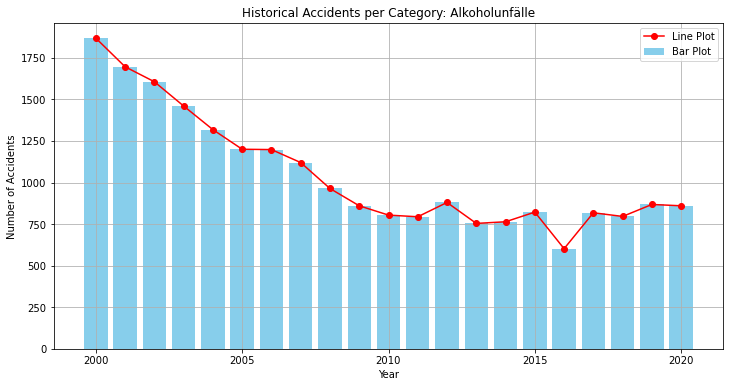

In [97]:
# Visualizing the data
plt.figure(figsize=(12, 6))

# Bar Plot
plt.bar(aggr_data['JAHR'], aggr_data['WERT'], color='skyblue', label='Bar Plot')

# Line Plot
plt.plot(aggr_data['JAHR'], aggr_data['WERT'], color='red', marker='o', label='Line Plot')

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title(f'Historical Accidents per Category: {category}')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

### The plot shows a downward trend in the number of accidents over the years.

Let us use the SARIMA model to forecast the number of accidents for the category 'Alkoholunfälle' and type 'insgesamt' for the year 2021 and month 01.

In [98]:
!pip install pmdarima
from pmdarima import auto_arima

In [99]:
#Prepare the training and test set
training = filtered_data[['JAHR', 'MONATSZAHL', 'WERT']].copy()
#test = filtered_data.iloc[-31:, :]

In [100]:
# SARIMA Model
# Train the SARIMA model
model = auto_arima(training['WERT'], m=12)

In [101]:
# Forecast for 2021-01
forecast = model.predict(n_periods=1)

print(f"Forecasted number of accidents for Alkoholunfälle (insgesamt) in 2021-01: {forecast}")

Forecasted number of accidents for Alkoholunfälle (insgesamt) in 2021-01: 273    138.149907
dtype: float64


C:\Users\Shaikh Rezwan\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Shaikh Rezwan\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


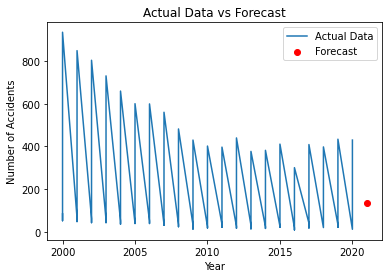

In [102]:
# Plotting the 'filtered_data'
plt.plot(filtered_data['JAHR'], filtered_data['WERT'], label='Actual Data')

# Adding a marker for the forecasted value
plt.scatter(2021, forecast, color='red', label='Forecast')

# Setting plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Actual Data vs Forecast')

# Displaying a legend
plt.legend()

# Showing the plot
plt.show()

In [103]:
# Filter the 'filtered_data' DataFrame for the date 2021-01
actual_value = df_sp.loc[(df_sp['JAHR'] == 2021) & (df_sp['MONAT'] == '202101')]

print(f"Actual value on 2021-01: {actual_value}")

Actual value on 2021-01:            MONATSZAHL              AUSPRÄGUNG  JAHR   MONAT    WERT
13     Alkoholunfälle               insgesamt  2021  202101    16.0
311    Alkoholunfälle  Verletzte und Getötete  2021  202101     5.0
609     Fluchtunfälle               insgesamt  2021  202101   521.0
907     Fluchtunfälle  Verletzte und Getötete  2021  202101     8.0
1205  Verkehrsunfälle               insgesamt  2021  202101  2153.0
1503  Verkehrsunfälle     mit Personenschäden  2021  202101   157.0
1801  Verkehrsunfälle  Verletzte und Getötete  2021  202101   177.0


In [104]:
# Convert the forecasted value to a numpy array
forecast_value = np.array(forecast)

# Extract the forecasted value for the specific date (e.g., 2021-01)
forecasted_value_on_date = forecast_value[0]

# Define the actual value
actual_value = 16.0

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error([actual_value], [forecasted_value_on_date]))

print(f"RMSE between the forecasted value and the actual value: {rmse}")

RMSE between the forecasted value and the actual value: 122.14990731060038
